In [6]:
!pip install wordcloud

In [11]:
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from PIL import Image

In [8]:
wordcloud.__version__

'1.8.0'

In [9]:
alice_text = open('alice_novel.txt', 'r').read()

In [17]:
with open('alice_novel.txt', 'r') as text:
    alice = text.read()

In [18]:
print(alice[1000:1500])
print('---')

ures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought
---


In [31]:
wordcloud.STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [19]:
en_stopwords = wordcloud.STOPWORDS

In [20]:
word_cloud = wordcloud.WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=en_stopwords
)

In [21]:
#cari kata yg sering muncul
word_cloud.generate(alice)

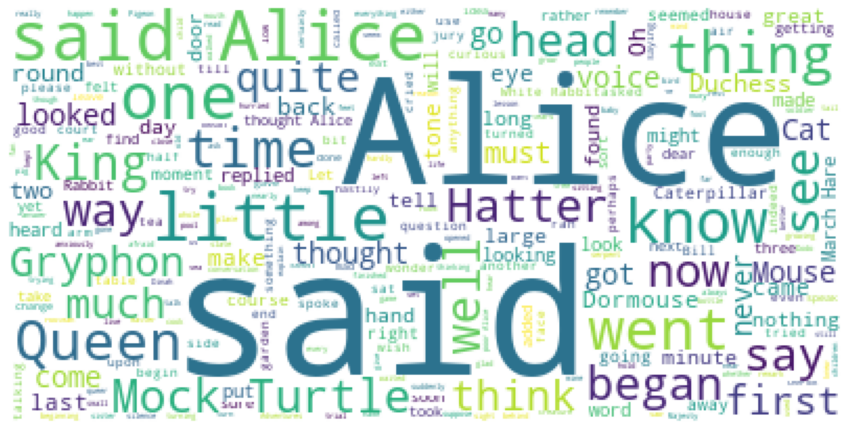

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

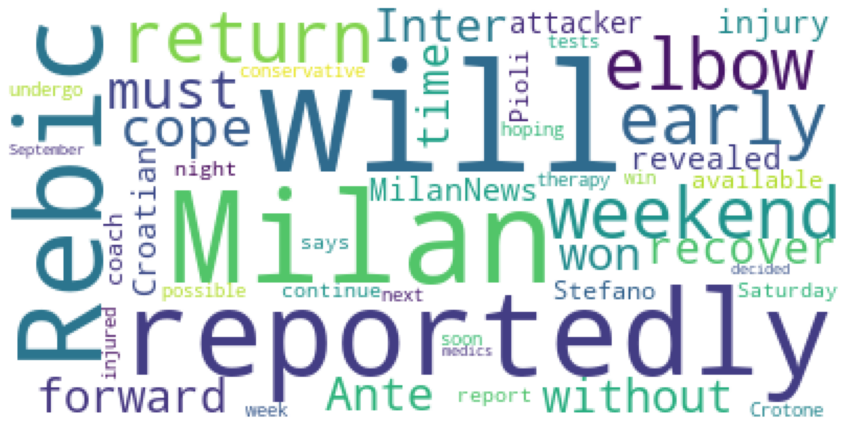

In [30]:
text = '''Milan must reportedly cope without Ante Rebic against Inter this weekend, as the forward won’t recover in time from an elbow injury. 
MilanNews has revealed the Croatian attacker will not be available for coach Stefano Pioli on Saturday night. The report says he will continue conservative therapy and will undergo further tests early next week, hoping to return as soon as possible.

Rebic injured his elbow in a 2-0 win against Crotone in September and the Milan medics have reportedly decided it’s too early for him to return this weekend'''

word_cloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

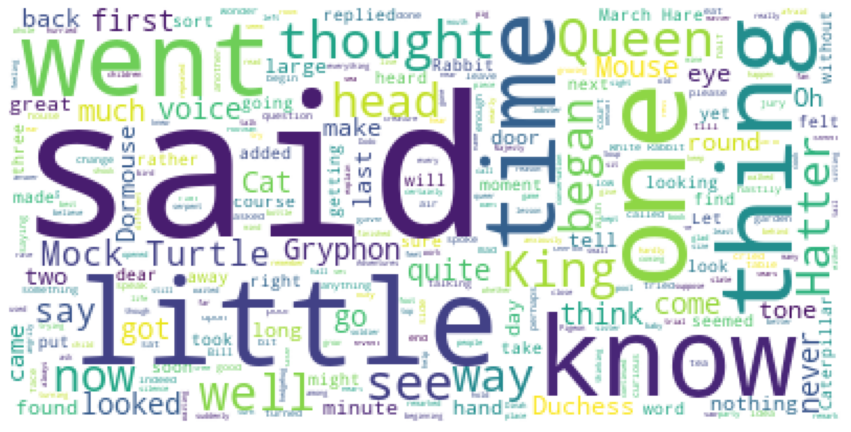

In [34]:
#nambahin stopwords 
en_stopwords.add('must')
word_cloud.generate(alice)

plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [39]:
alice_img = Image.open('./alice_mask.png')
alice_mask = np.array(alice_img)

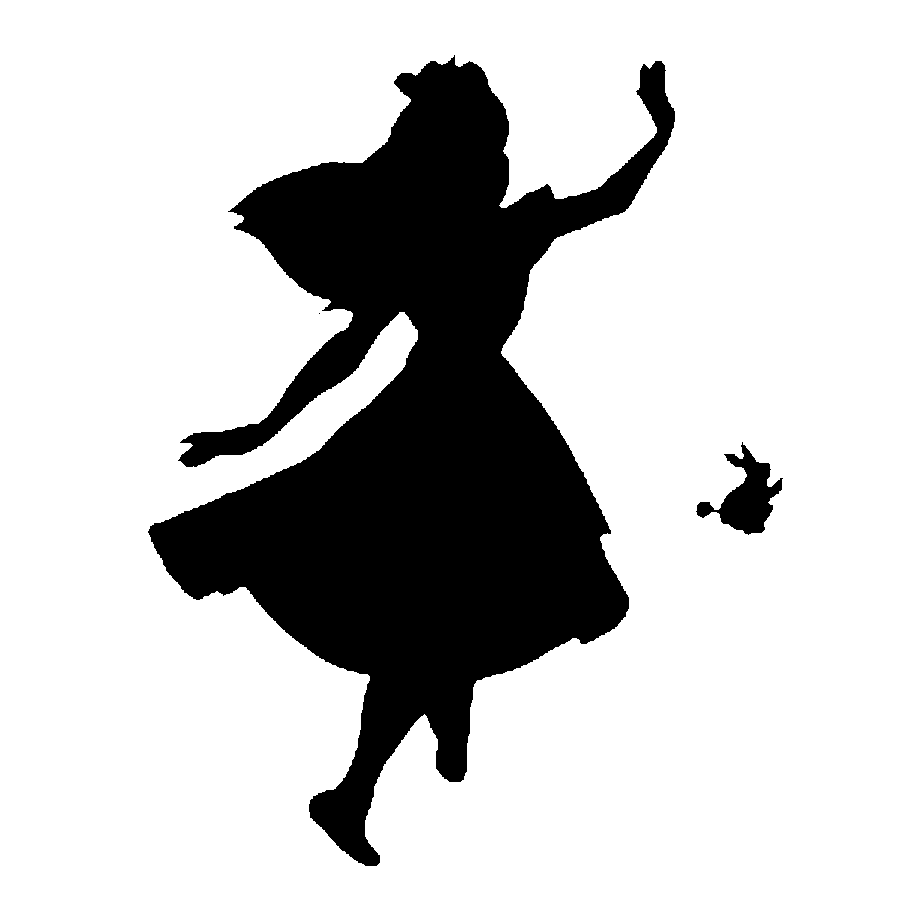

In [37]:
alice_img

In [40]:
alice_mask.shape

(900, 900)

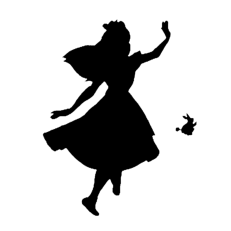

In [43]:
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

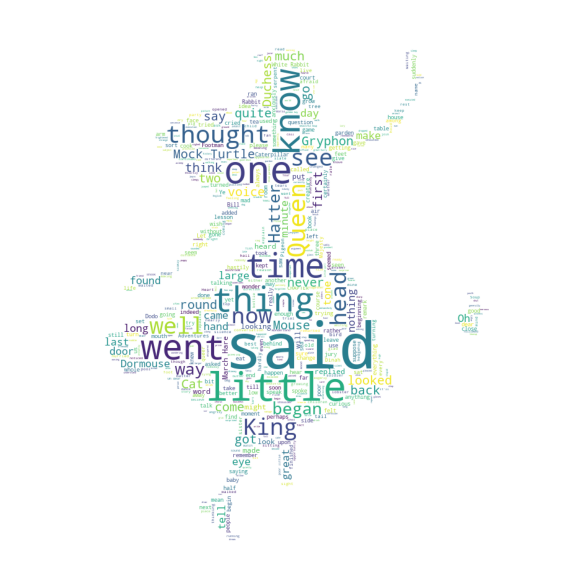

In [44]:
alice_wc = wordcloud.WordCloud(
    background_color='white',
    max_words=3000,
    mask=alice_mask,
    stopwords=en_stopwords
)
alice_wc.generate(alice)

plt.figure(figsize=(10,15))
plt.imshow(alice_wc)
plt.axis('off')
plt.show()

In [46]:
df_canada = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                          sheet_name = 'Canada by Citizenship',
                          skiprows= range(20),
                          skipfooter=2
)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [47]:
df_canada['total'] = df_canada.sum(axis=1)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [76]:
int(round(
    (
        df_canada.loc[df_canada.OdName == 'China', 'total'] / df_canada['total'].sum())*100)
   )

9

In [72]:
max_words = 100
text =''
for country in df_canada.OdName.values:
    if len(country.split()) ==1:
        repeat_num_times = int(
            df_canada.loc[
                df_canada['OdName']==country,
                'total'
            ] / float(df_canada['total'].sum()) * max_words
        )
        text = text + ((country + ' ')* repeat_num_times)

In [73]:
text

'Algeria Bangladesh China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Iraq Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

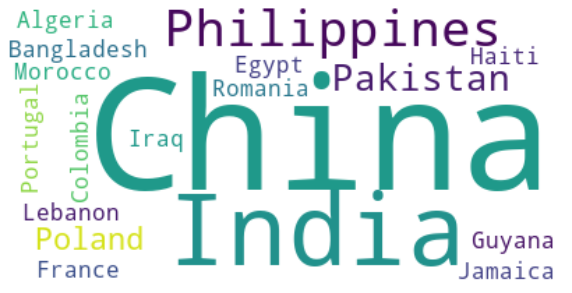

In [74]:
immigrant_wc = wordcloud.WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,15))
plt.imshow(immigrant_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
#https://seaborn.pydata.org/

In [81]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(0))
df_total = df_total.reset_index()
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


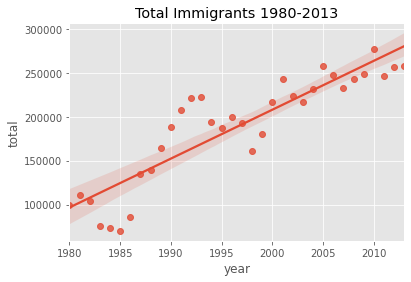

In [84]:
plt.style.use('ggplot')
sns.regplot(x='year', y='total', data=df_total)
plt.title('Total Immigrants 1980-2013')
plt.show()

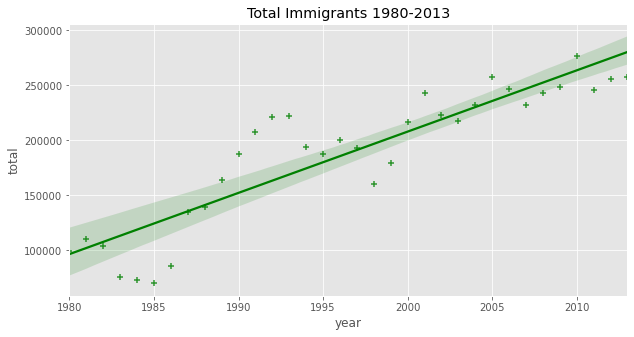

In [88]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.regplot(
    x='year', y='total', data=df_total,
    color='green', marker='+'
)
plt.title('Total Immigrants 1980-2013')
plt.show()

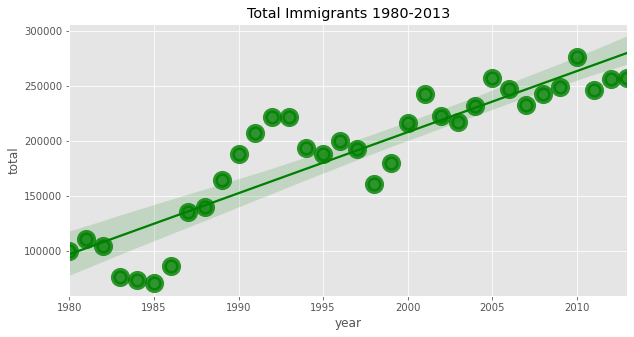

In [91]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.regplot(
    x='year', y='total', data=df_total,
    color='green', marker='o', scatter_kws={'s':200, 'linewidth': 5}
)
plt.title('Total Immigrants 1980-2013')
plt.show()

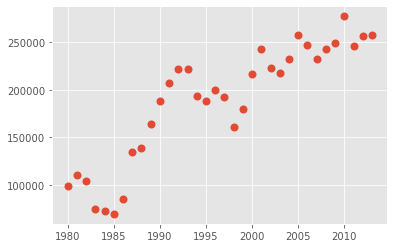

In [93]:
plt.scatter(df_total['year'], df_total['total'], linewidth= 2)

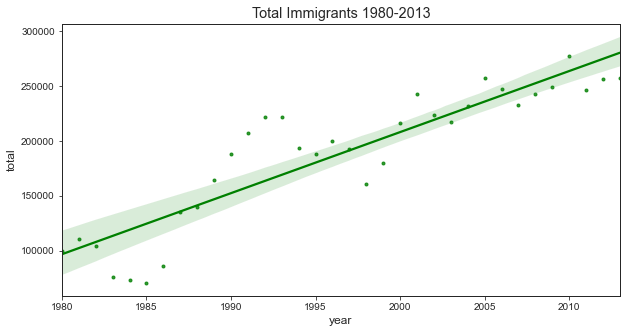

In [94]:
sns.set_style('ticks') #whitegrid, blackgrid
plt.figure(figsize=(10,5))
sns.regplot(
    x='year', y='total', data=df_total,
    color='green', marker='.'
)
plt.title('Total Immigrants 1980-2013')
plt.show()

In [96]:
!pip install folium

In [99]:
folium.__version__

'0.11.0'

In [100]:
maps = folium.Map()
maps

In [103]:
bdg = folium.Map(location=(-6.9174639, 107.6191228), zoom_start=12)
bdg

In [106]:
bdg = folium.Map(location=(-6.9174639, 107.6191228), zoom_start=12, tiles='Stamen Toner')
bdg

In [3]:
sf_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [4]:
sf_incidents.shape

(150500, 13)

In [5]:
sf_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [6]:
sf_lat = 37.77
sf_long = -122.42

sf_map = folium.Map(location=(sf_lat, sf_long), zoom_start=12)
sf_map

In [7]:
a = [1,2,3]
b = [10,20,30]

for i, j in zip(a,b):
    print(i,j)

1 10
2 20
3 30


In [8]:
subset_sf_incidents = sf_incidents.loc[:25]
subset_sf_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [9]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(subset_sf_incidents.Y, subset_sf_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
sf_map.add_child(incidents)

In [10]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(subset_sf_incidents.Y, subset_sf_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
labels = sf_incidents.Category.tolist()
for lat, long, label in zip(subset_sf_incidents.Y, subset_sf_incidents.X, labels):
    folium.Marker((lat, long), popup=label).add_to(sf_map)
    
sf_map.add_child(incidents)

In [14]:
sf_map = folium.Map((sf_lat, sf_long), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, long, label in zip(subset_sf_incidents.Y, subset_sf_incidents.X, labels):
    folium.Marker(
        location=(lat, long),
        icon=None,
        popup=label
    ).add_to(incidents)

sf_map

In [ ]:
#Chloropleth